[View in Colaboratory](https://colab.research.google.com/github/TimSim/SentimentAnalysis/blob/master/SentimentAnalysisWithLSTM.ipynb)

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls -la "/content/drive/My Drive/Colab Notebooks/sentimentAnalysis/"

total 104697
drwx------ 2 root root     4096 Oct 10 22:50 negativeReviews
drwx------ 2 root root     4096 Oct 10 22:51 positiveReviews
-rw------- 1 root root 27200080 Oct  3 23:56 wordsList.npy
-rw------- 1 root root 80000080 Oct  3 23:56 wordVectors.npy


In [6]:

import numpy as np
wordsList = np.load('/content/drive/My Drive/Colab Notebooks/sentimentAnalysis/wordsList.npy')
print('Loaded the word list!')
wordsList = wordsList.tolist() #Originally loaded as numpy array
wordsList = [word.decode('UTF-8') for word in wordsList] #Encode words as UTF-8
wordVectors = np.load('/content/drive/My Drive/Colab Notebooks/sentimentAnalysis/wordVectors.npy')
print ('Loaded the word vectors!')

Loaded the word list!
Loaded the word vectors!


In [7]:
print(len(wordsList))
print(wordVectors.shape)

400000
(400000, 50)


In [8]:

baseballIndex = wordsList.index('baseball')
wordVectors[baseballIndex]

array([-1.9327  ,  1.0421  , -0.78515 ,  0.91033 ,  0.22711 , -0.62158 ,
       -1.6493  ,  0.07686 , -0.5868  ,  0.058831,  0.35628 ,  0.68916 ,
       -0.50598 ,  0.70473 ,  1.2664  , -0.40031 , -0.020687,  0.80863 ,
       -0.90566 , -0.074054, -0.87675 , -0.6291  , -0.12685 ,  0.11524 ,
       -0.55685 , -1.6826  , -0.26291 ,  0.22632 ,  0.713   , -1.0828  ,
        2.1231  ,  0.49869 ,  0.066711, -0.48226 , -0.17897 ,  0.47699 ,
        0.16384 ,  0.16537 , -0.11506 , -0.15962 , -0.94926 , -0.42833 ,
       -0.59457 ,  1.3566  , -0.27506 ,  0.19918 , -0.36008 ,  0.55667 ,
       -0.70315 ,  0.17157 ], dtype=float32)

In [9]:
import tensorflow as tf
maxSeqLength = 10 #Maximum length of sentence
numDimensions = 300 #Dimensions for each word vector
firstSentence = np.zeros((maxSeqLength), dtype='int32')
firstSentence[0] = wordsList.index("i")
firstSentence[1] = wordsList.index("thought")
firstSentence[2] = wordsList.index("the")
firstSentence[3] = wordsList.index("movie")
firstSentence[4] = wordsList.index("was")
firstSentence[5] = wordsList.index("incredible")
firstSentence[6] = wordsList.index("and")
firstSentence[7] = wordsList.index("inspiring")
#firstSentence[8] and firstSentence[9] are going to be 0
print(firstSentence.shape)
print(firstSentence) #Shows the row index for each word

(10,)
[    41    804 201534   1005     15   7446      5  13767      0      0]


In [10]:
with tf.Session() as sess:
    print(tf.nn.embedding_lookup(wordVectors,firstSentence).eval().shape)

(10, 50)


In [11]:
from os import listdir
from os.path import isfile, join
positiveFiles = ['/content/drive/My Drive/Colab Notebooks/sentimentAnalysis/positiveReviews/' + f for f in listdir('/content/drive/My Drive/Colab Notebooks/sentimentAnalysis/positiveReviews/') if isfile(join('/content/drive/My Drive/Colab Notebooks/sentimentAnalysis/positiveReviews/', f))]
negativeFiles = ['/content/drive/My Drive/Colab Notebooks/sentimentAnalysis/negativeReviews/' + f for f in listdir('/content/drive/My Drive/Colab Notebooks/sentimentAnalysis/negativeReviews/') if isfile(join('/content/drive/My Drive/Colab Notebooks/sentimentAnalysis/negativeReviews/', f))]
numWords = []
for pf in positiveFiles:
    with open(pf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)       
print('Positive files finished')

for nf in negativeFiles:
    with open(nf, "r", encoding='utf-8') as f:
        line=f.readline()
        counter = len(line.split())
        numWords.append(counter)  
print('Negative files finished')

numFiles = len(numWords)
print('The total number of files is', numFiles)
print('The total number of words in the files is', sum(numWords))
print('The average number of words in the files is', sum(numWords)/len(numWords))

Positive files finished
Negative files finished
The total number of files is 25000
The total number of words in the files is 5844680
The average number of words in the files is 233.7872


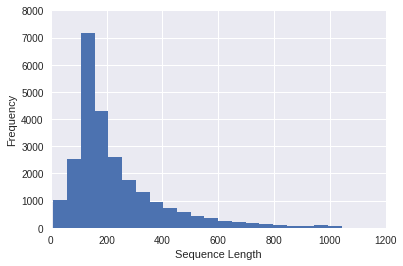

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(numWords, 50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.axis([0, 1200, 0, 8000])
plt.show()

In [0]:
maxSeqLength = 250

In [14]:
fname = positiveFiles[3] #Can use any valid index (not just 3)
with open(fname) as f:
    for lines in f:
        print(lines)
        exit

This film came out 12 years years ago, and was a revelation even for people who knew something of the drag scene in New York. The textbooks on drag performance say nothing of these vogueing houses. Anthony Slide's 'Great Pretenders' says nothing. Julian Fleisher's "The Drag Queens of New York: An Illustrated Field Guide" with its flow chart of influence that pulls together Julian Eltinge, Minette, the Warhol queens, and the 90s club scene - and postdates the film - ignores the houses completely. Even Laurence Senelick's "The Changing Room" - the closest thing that we have to a definitive book on drag performance rushes quickly past the film and does not give the background information that one would have expected from it.<br /><br />I understand from the film itself,and various articles I found on the web that this house system goes back decades. The major film performance by a house member prior to 1990 seems to be Chrystal La Beija in "The Queen", 1968. The historical context is the 

In [0]:
# Removes punctuation, parentheses, question marks, etc., and leaves only alphanumeric characters
import re
strip_special_chars = re.compile("[^A-Za-z0-9 ]+")

def cleanSentences(string):
    string = string.lower().replace("<br />", " ")
    return re.sub(strip_special_chars, "", string.lower())

In [16]:
firstFile = np.zeros((maxSeqLength), dtype='int32')
with open(fname) as f:
    indexCounter = 0
    line=f.readline()
    cleanedLine = cleanSentences(line)
    split = cleanedLine.split()
    for word in split:
        if indexCounter < maxSeqLength:
            try:
                firstFile[indexCounter] = wordsList.index(word)
            except ValueError:
                firstFile[indexCounter] = 399999 #Vector for unknown words
        indexCounter = indexCounter + 1
firstFile

array([    37,    319,    263,     66,    421,     82,     82,    363,
            5,     15,      7,  10758,    151,     10,     69,     38,
         1522,    645,      3, 201534,   7280,   1500,      6,     50,
          196, 201534,  14239,     13,   7280,    883,    203,    936,
            3,    158, 399999,   1631,   3532,  14986,    353,  45895,
          210,    936,   8385, 399999, 201534,   7280,   6692,      3,
           50,    196,     29,   6937,    610,   3372,     17,     47,
         2981,   3099,      3,   1729,     12,  11110,    600,   8385,
       258132, 143245, 201534,  20750,   6692,      5, 201534,  18297,
          449,   1500,      5, 301250, 201534,    319,  19705, 201534,
         1631,   2215,    151,  13591, 399999, 201534,   2803,    927,
       201534,   5275,    873,     12,     53,     33,      4,      7,
        10504,    539,     13,   7280,    883,  21485,   1177,    341,
       201534,    319,      5,    260,     36,    455, 201534,   2093,
      

In [0]:
# ids = np.zeros((numFiles, maxSeqLength), dtype='int32')
# fileCounter = 0
# for pf in positiveFiles:
#    with open(pf, "r") as f:
#        indexCounter = 0
#        line=f.readline()
#        cleanedLine = cleanSentences(line)
#        split = cleanedLine.split()
#        for word in split:
#            try:
#                ids[fileCounter][indexCounter] = wordsList.index(word)
#            except ValueError:
#                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
#            indexCounter = indexCounter + 1
#            if indexCounter >= maxSeqLength:
#                break
#        fileCounter = fileCounter + 1 

# for nf in negativeFiles:
#    with open(nf, "r") as f:
#        indexCounter = 0
#        line=f.readline()
#        cleanedLine = cleanSentences(line)
#        split = cleanedLine.split()
#        for word in split:
#            try:
#                ids[fileCounter][indexCounter] = wordsList.index(word)
#            except ValueError:
#                ids[fileCounter][indexCounter] = 399999 #Vector for unkown words
#            indexCounter = indexCounter + 1
#            if indexCounter >= maxSeqLength:
#                break
#        fileCounter = fileCounter + 1 
# #Pass into embedding function and see if it evaluates. 

# np.save('idsMatrix', ids)

In [0]:
ids = np.load('/content/drive/My Drive/Colab Notebooks/sentimentAnalysis/idsMatrix.npy')

In [0]:
from random import randint

def getTrainBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        if (i % 2 == 0): 
            num = randint(1,11499)
            labels.append([1,0])
        else:
            num = randint(13499,24999)
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

def getTestBatch():
    labels = []
    arr = np.zeros([batchSize, maxSeqLength])
    for i in range(batchSize):
        num = randint(11499,13499)
        if (num <= 12499):
            labels.append([1,0])
        else:
            labels.append([0,1])
        arr[i] = ids[num-1:num]
    return arr, labels

In [0]:
batchSize = 24
lstmUnits = 64
numClasses = 2
iterations = 100000

In [0]:
import tensorflow as tf
tf.reset_default_graph()

labels = tf.placeholder(tf.float32, [batchSize, numClasses])
input_data = tf.placeholder(tf.int32, [batchSize, maxSeqLength])

In [0]:
data = tf.Variable(tf.zeros([batchSize, maxSeqLength, numDimensions]),dtype=tf.float32)
data = tf.nn.embedding_lookup(wordVectors,input_data)

In [28]:
lstmCell = tf.contrib.rnn.BasicLSTMCell(lstmUnits)
lstmCell = tf.contrib.rnn.DropoutWrapper(cell=lstmCell, output_keep_prob=0.75)
value, _ = tf.nn.dynamic_rnn(lstmCell, data, dtype=tf.float32)

Instructions for updating:
This class is deprecated, please use tf.nn.rnn_cell.LSTMCell, which supports all the feature this cell currently has. Please replace the existing code with tf.nn.rnn_cell.LSTMCell(name='basic_lstm_cell').


In [0]:
weight = tf.Variable(tf.truncated_normal([lstmUnits, numClasses]))
bias = tf.Variable(tf.constant(0.1, shape=[numClasses]))
value = tf.transpose(value, [1, 0, 2])
last = tf.gather(value, int(value.get_shape()[0]) - 1)
prediction = (tf.matmul(last, weight) + bias)

In [0]:
correctPred = tf.equal(tf.argmax(prediction,1), tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(correctPred, tf.float32))

In [31]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=labels))
optimizer = tf.train.AdamOptimizer().minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
import datetime

tf.summary.scalar('Loss', loss)
tf.summary.scalar('Accuracy', accuracy)
merged = tf.summary.merge_all()
logdir = "tensorboard/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "/"
writer = tf.summary.FileWriter(logdir, sess.graph)

In [0]:
# sess = tf.InteractiveSession()
# saver = tf.train.Saver()
# sess.run(tf.global_variables_initializer())

# for i in range(iterations):
#    #Next Batch of reviews
#    nextBatch, nextBatchLabels = getTrainBatch();
#    sess.run(optimizer, {input_data: nextBatch, labels: nextBatchLabels})
   
#    #Write summary to Tensorboard
#    if (i % 50 == 0):
#        summary = sess.run(merged, {input_data: nextBatch, labels: nextBatchLabels})
#        writer.add_summary(summary, i)

#    #Save the network every 10,000 training iterations
#    if (i % 10000 == 0 and i != 0):
#        save_path = saver.save(sess, "models/pretrained_lstm.ckpt", global_step=i)
#        print("saved to %s" % save_path)
# writer.close()

In [35]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, tf.train.latest_checkpoint('/content/drive/My Drive/Colab Notebooks/sentimentAnalysis/models'))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1662: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


ValueError: ignored